In [1]:

import pandas as pd
import sweetviz as sv
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
data = pd.read_csv("../Occupancy_Estimation.csv")
data.columns = data.columns.str.strip().str.lower()
data.insert(2, "datetime", pd.to_datetime(data["date"] + " " + data["time"]))
data["room_occupancy_count"] = data["room_occupancy_count"].astype(int)
data = data.iloc[:, 2:]
data.head()

,datetime,s1_temp,s2_temp,s3_temp,s4_temp,s1_light,s2_light,s3_light,s4_light,s1_sound,s2_sound,s3_sound,s4_sound,s5_co2,s5_co2_slope,s6_pir,s7_pir,room_occupancy_count
0,2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              10129 non-null  datetime64[ns]
 1   s1_temp               10129 non-null  float64       
 2   s2_temp               10129 non-null  float64       
 3   s3_temp               10129 non-null  float64       
 4   s4_temp               10129 non-null  float64       
 5   s1_light              10129 non-null  int64         
 6   s2_light              10129 non-null  int64         
 7   s3_light              10129 non-null  int64         
 8   s4_light              10129 non-null  int64         
 9   s1_sound              10129 non-null  float64       
 10  s2_sound              10129 non-null  float64       
 11  s3_sound              10129 non-null  float64       
 12  s4_sound              10129 non-null  float64       
 13  s5_co2          

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



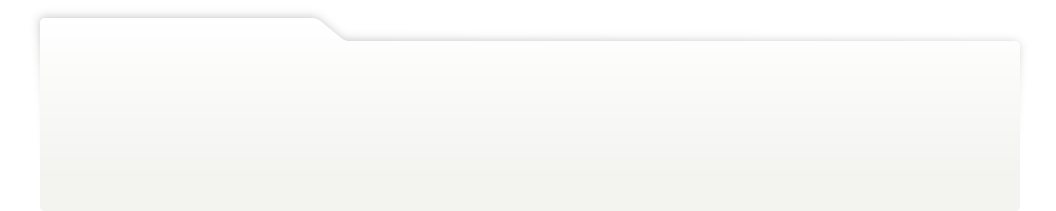
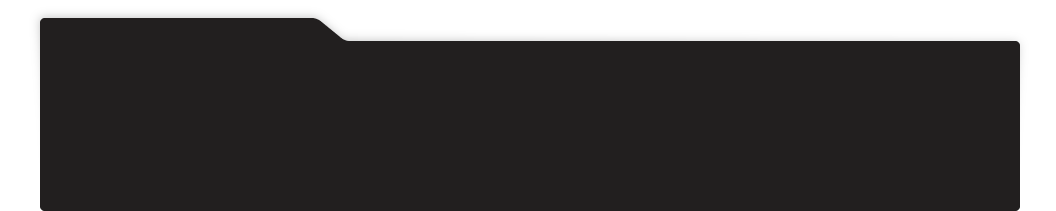
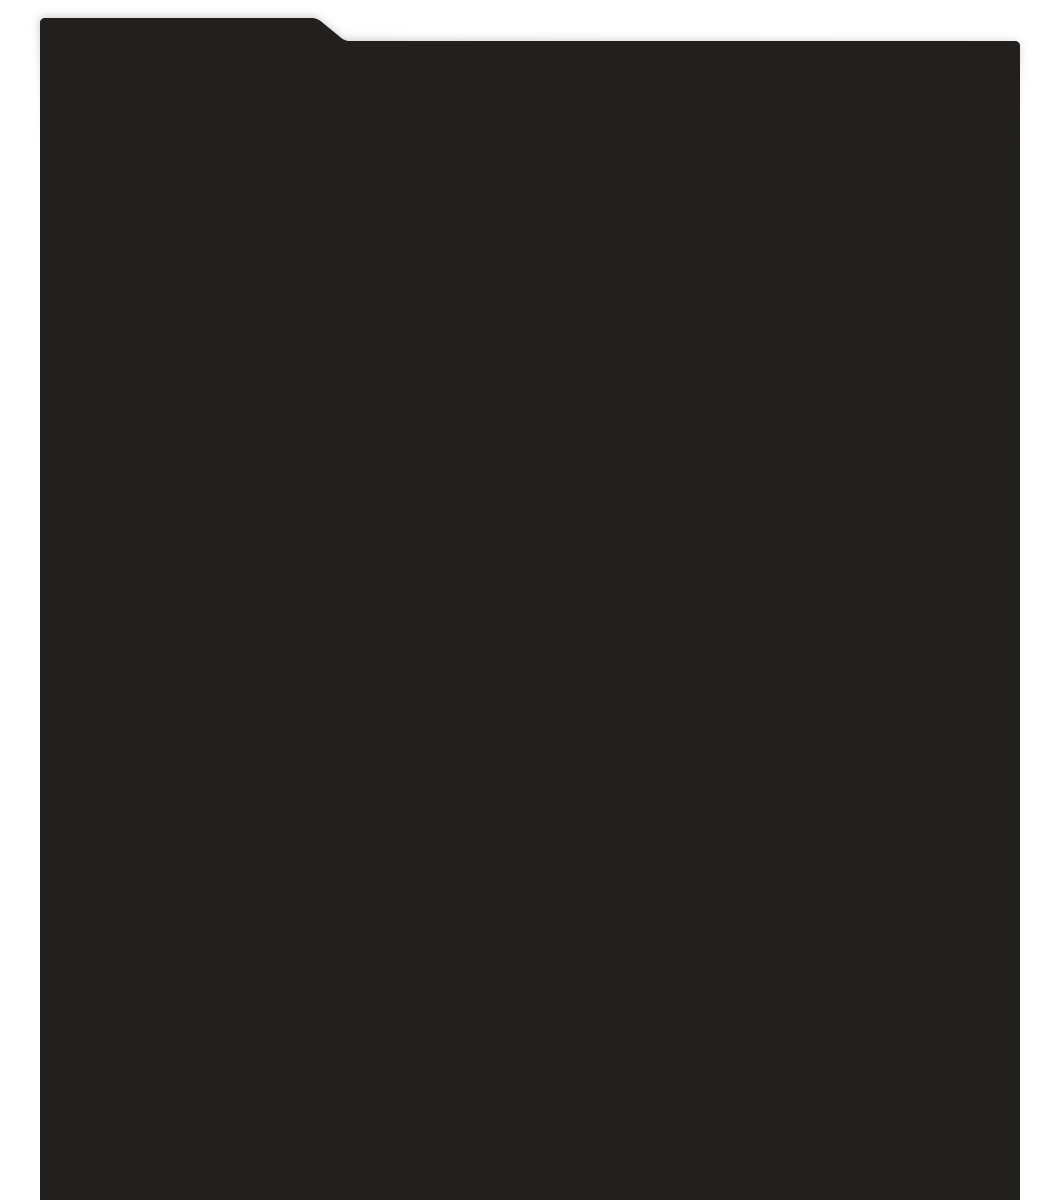
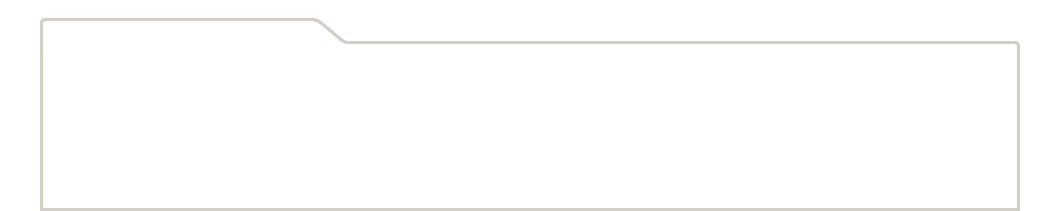
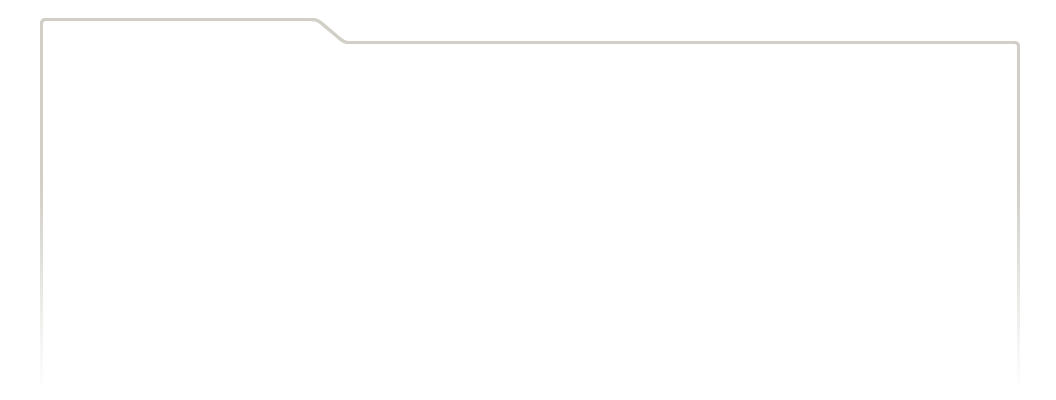
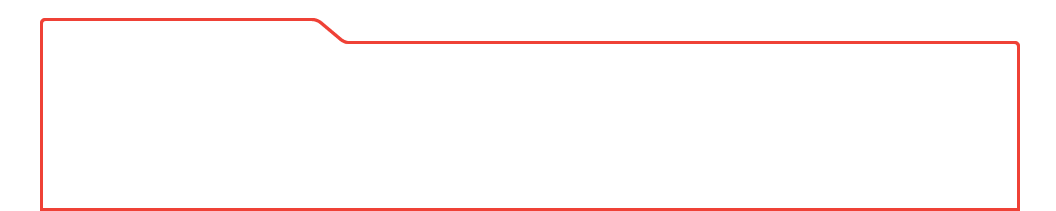
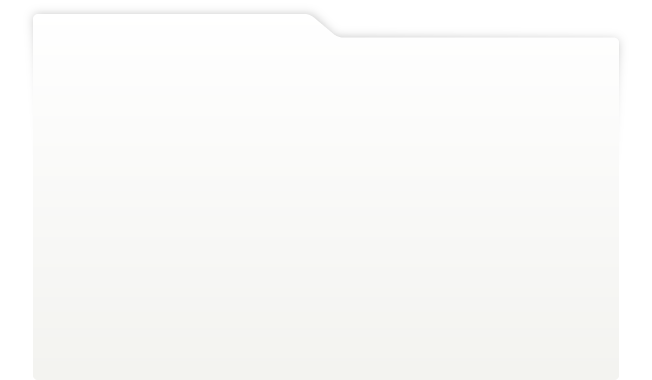
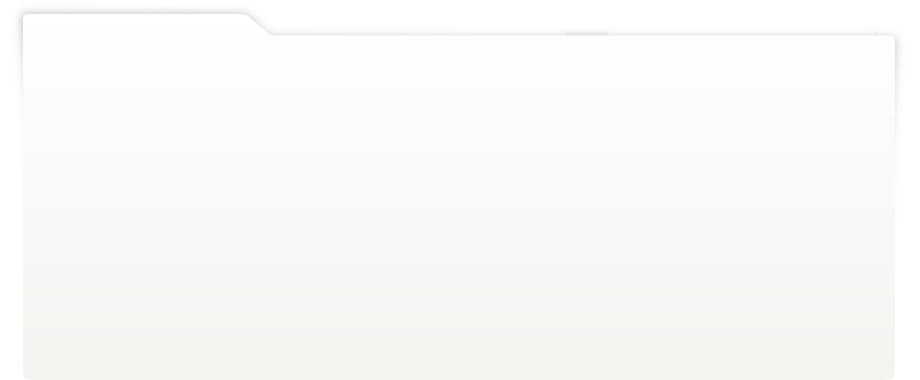
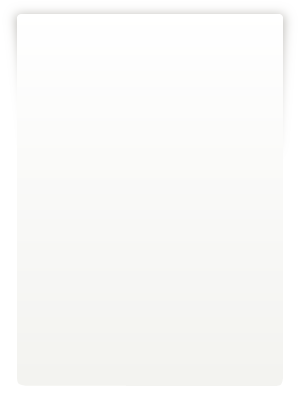
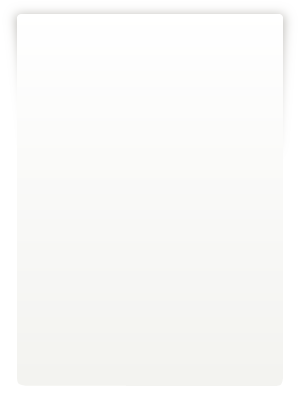
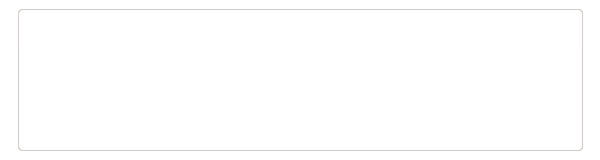
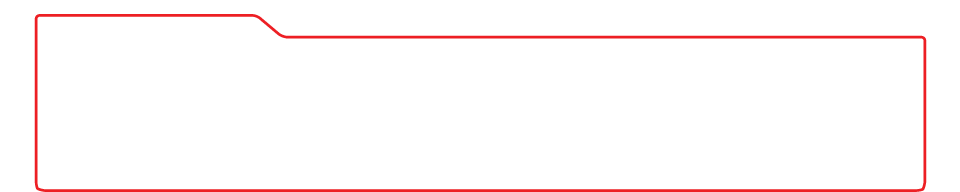
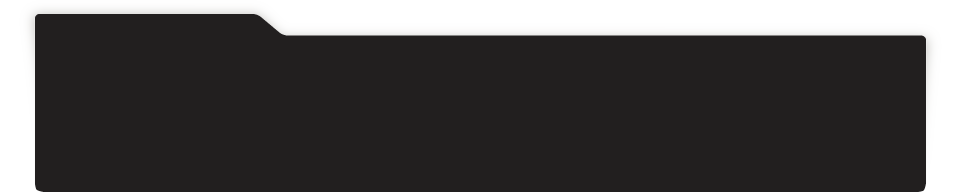
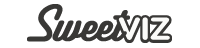
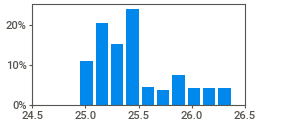
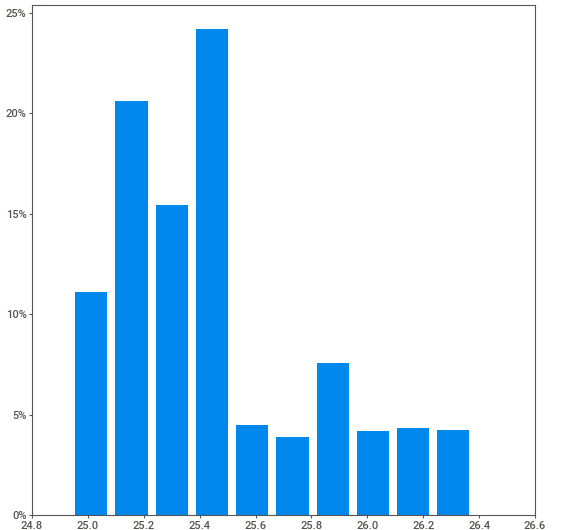
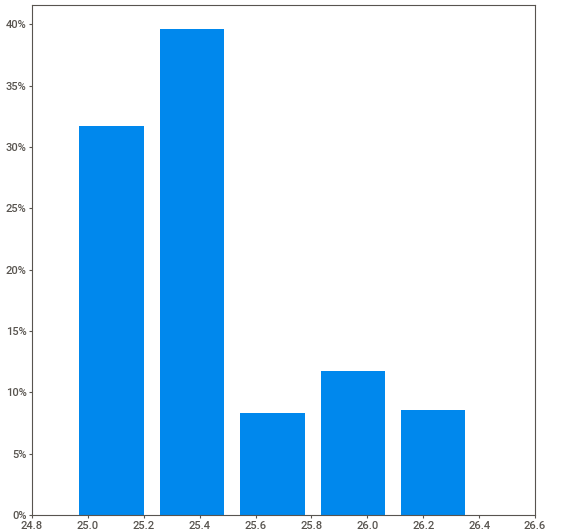
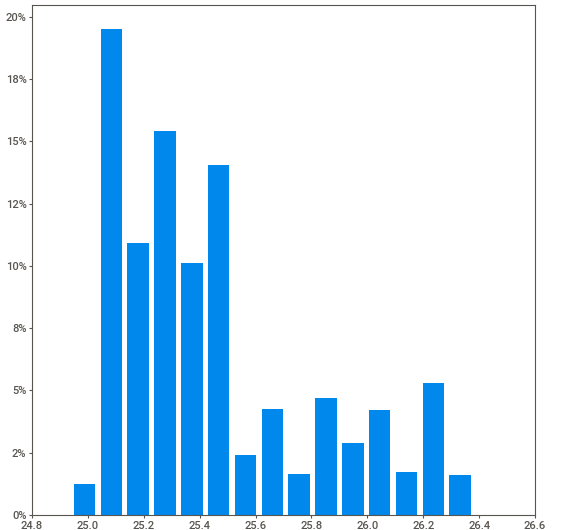
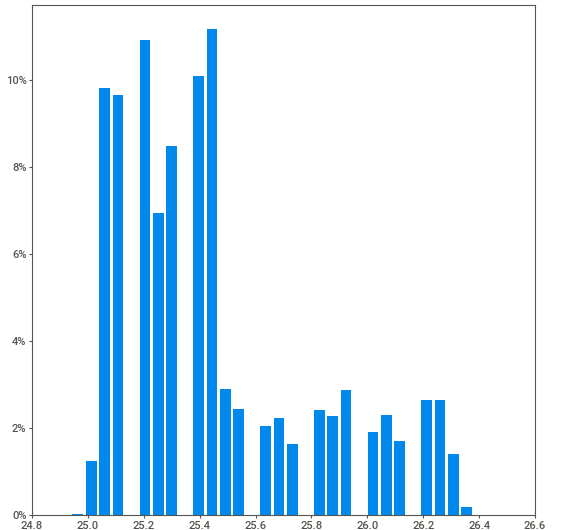
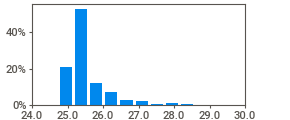
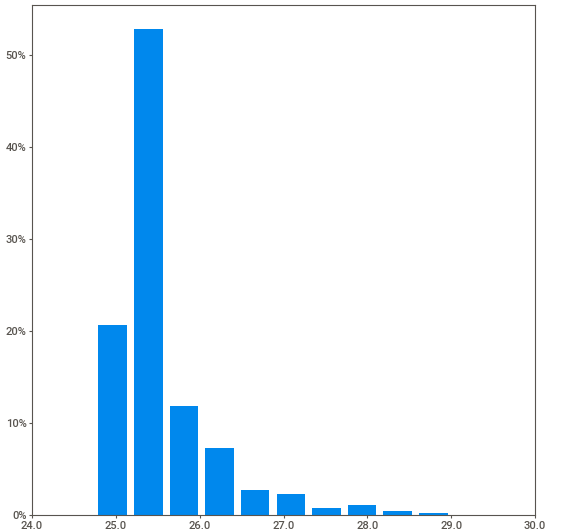
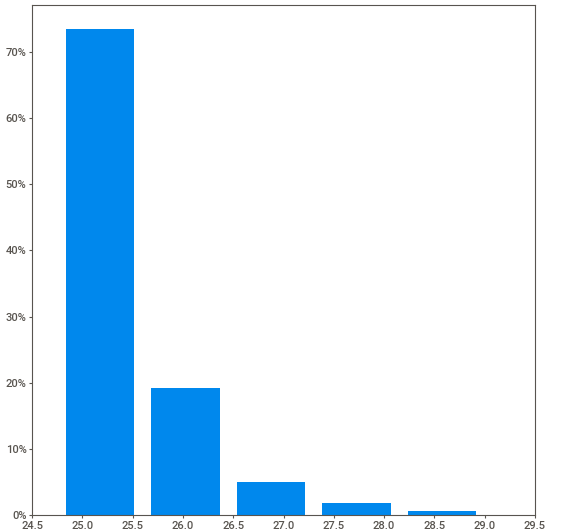
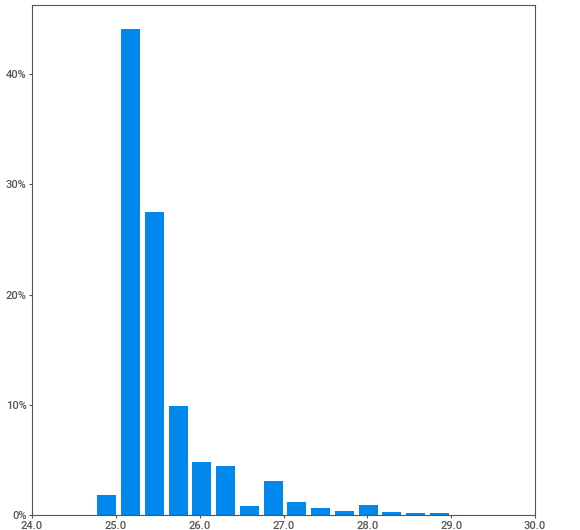
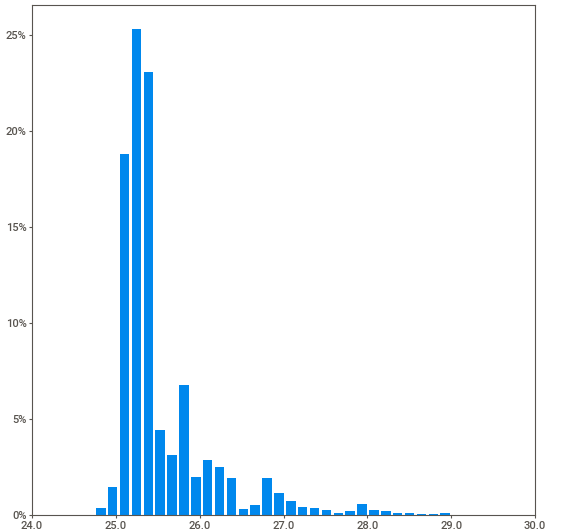
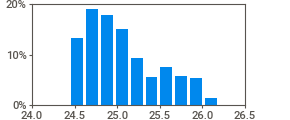
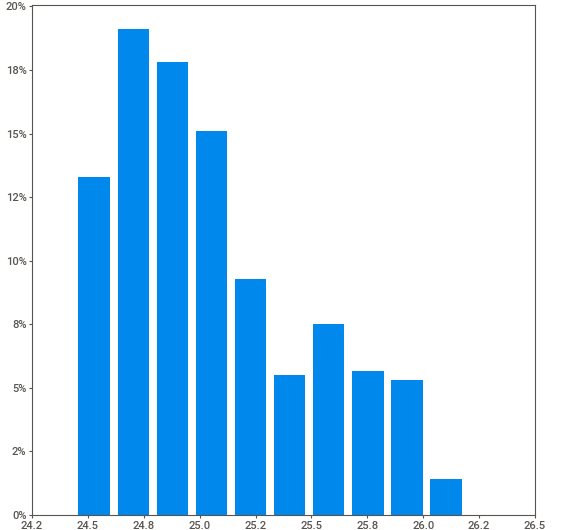
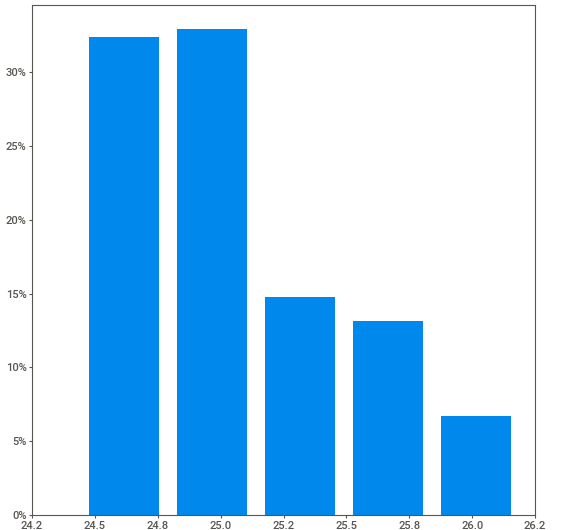
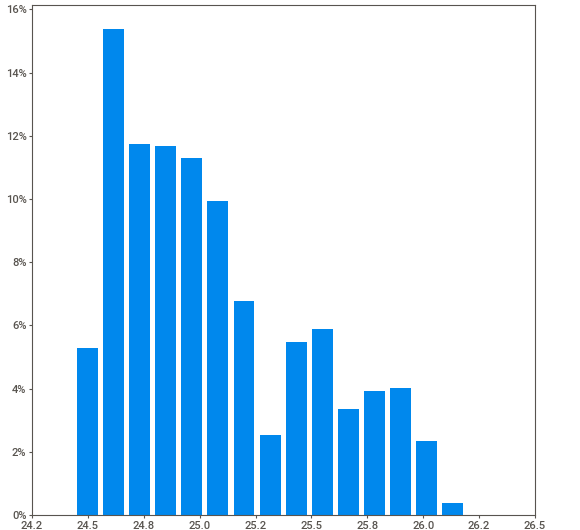
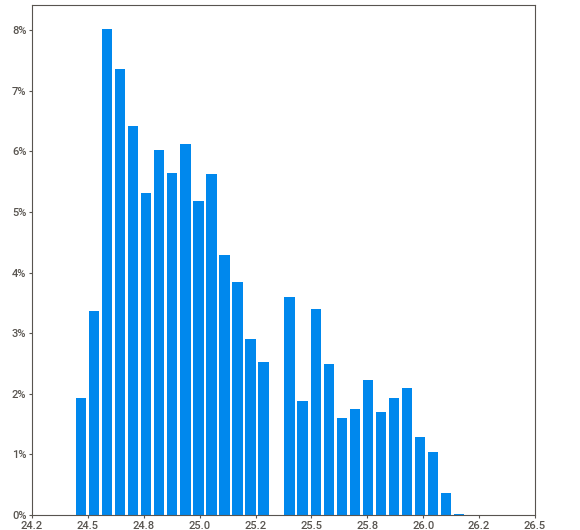
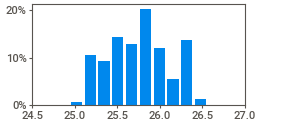
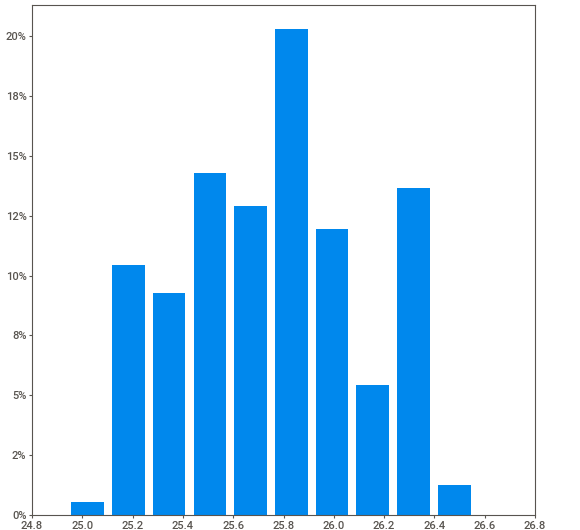
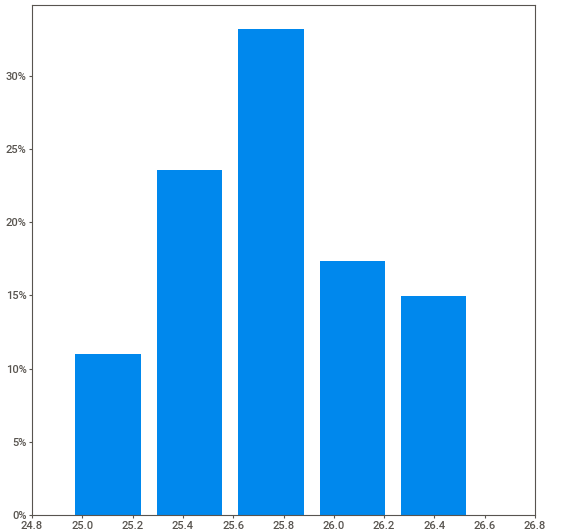
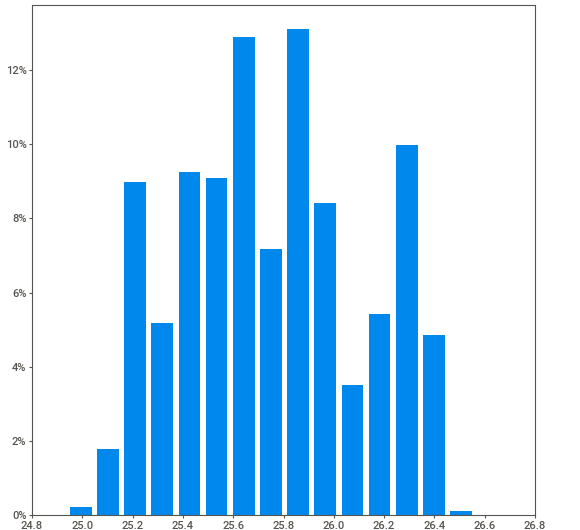
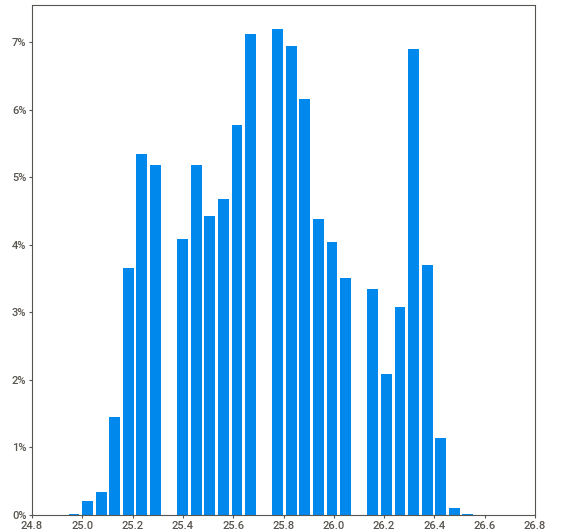
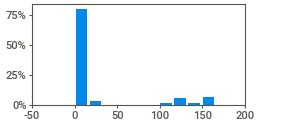
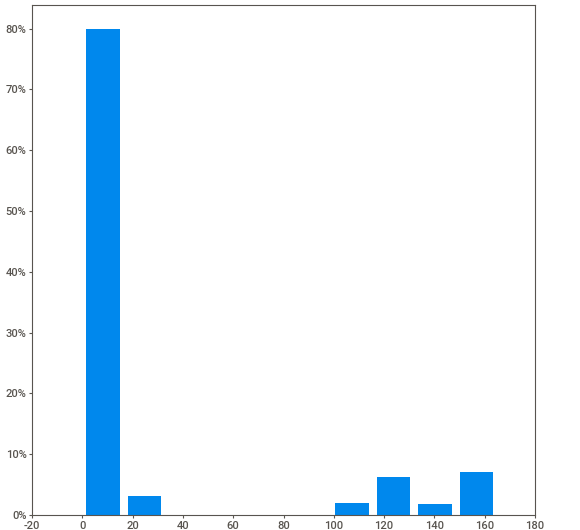
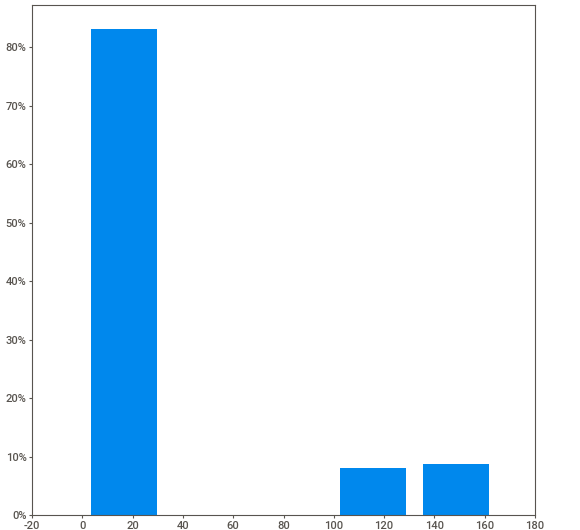
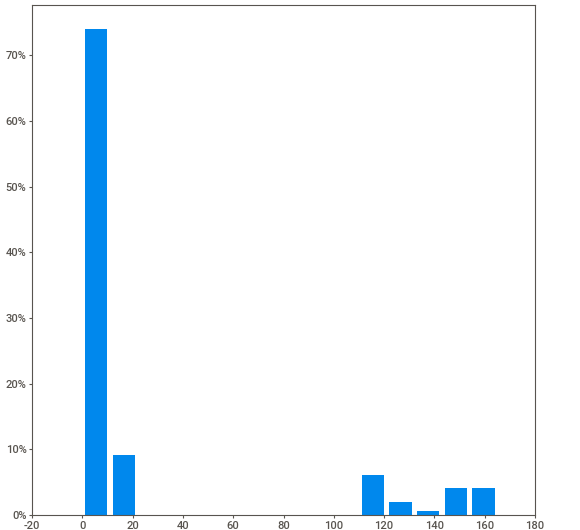
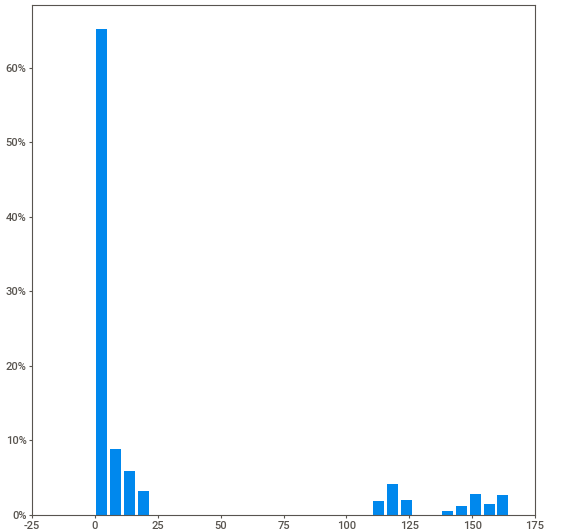
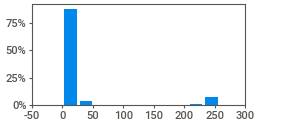
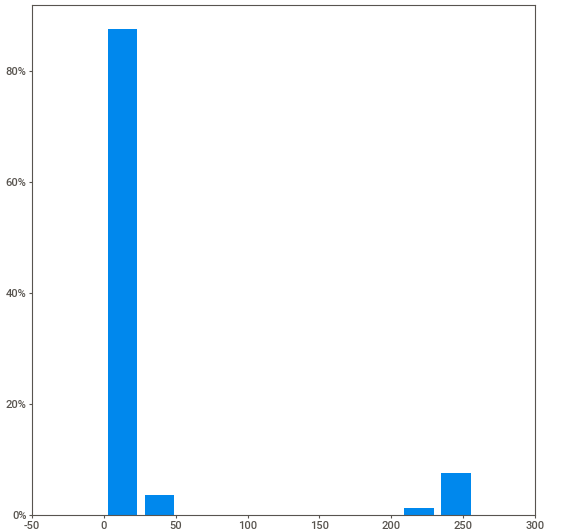
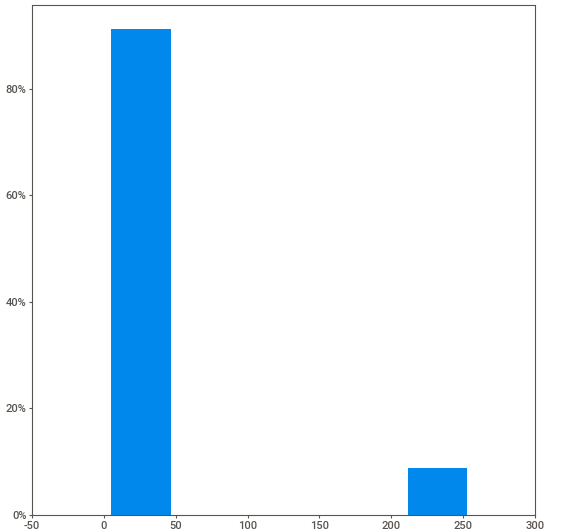
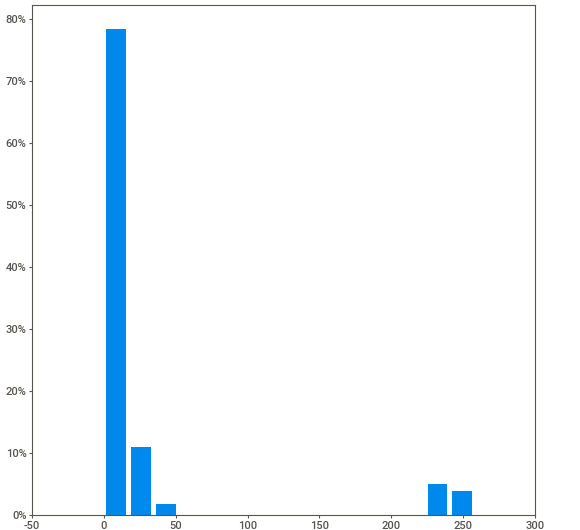
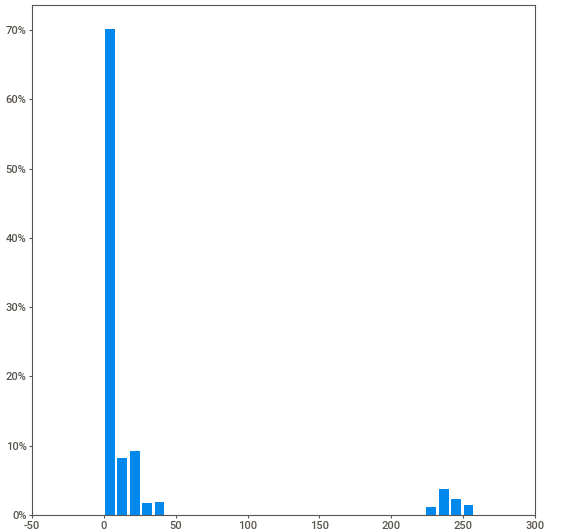
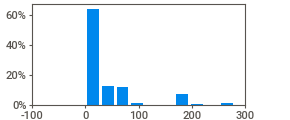
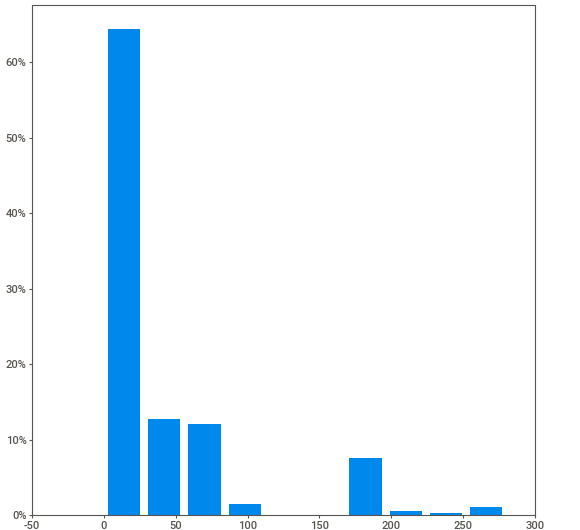
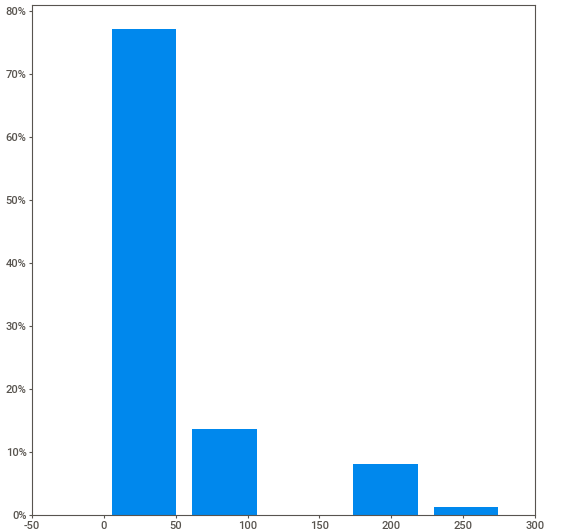
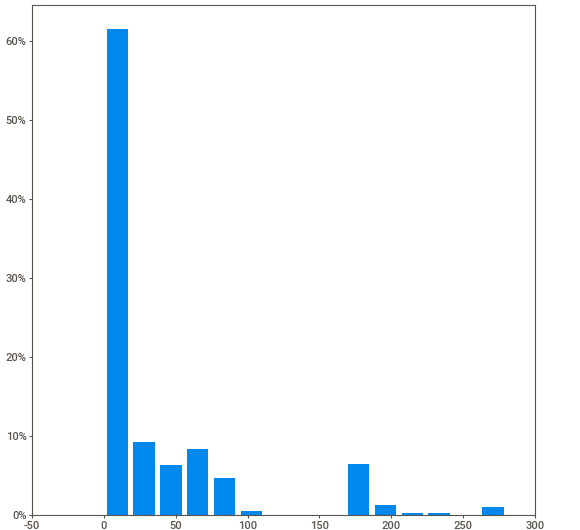
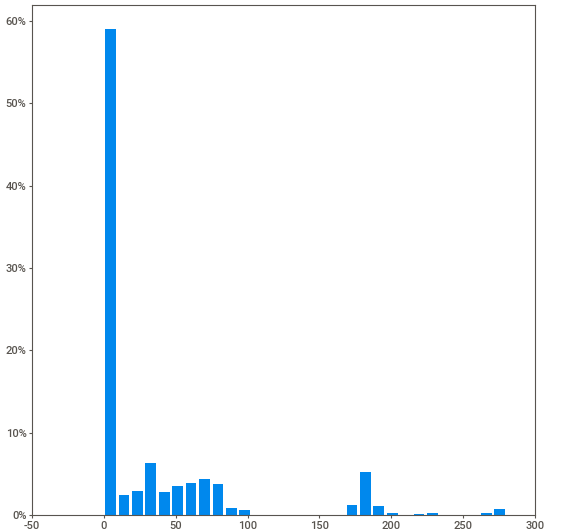
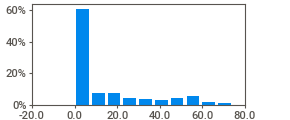
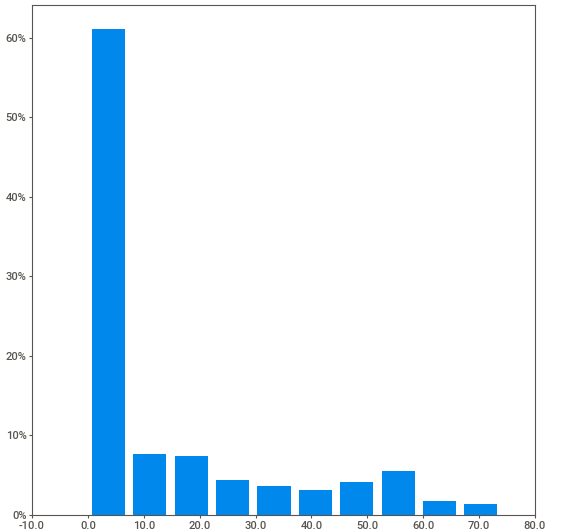
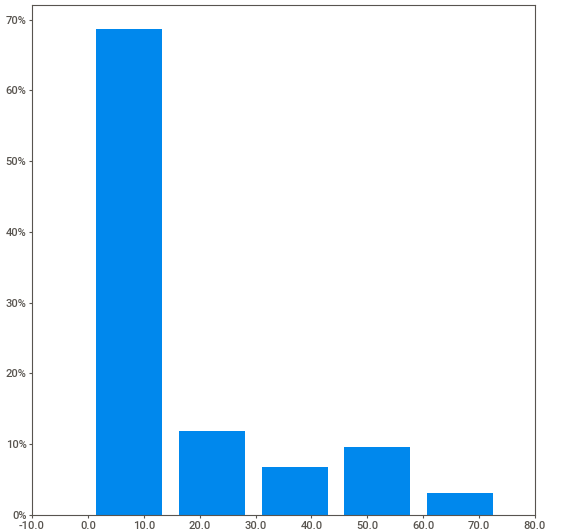
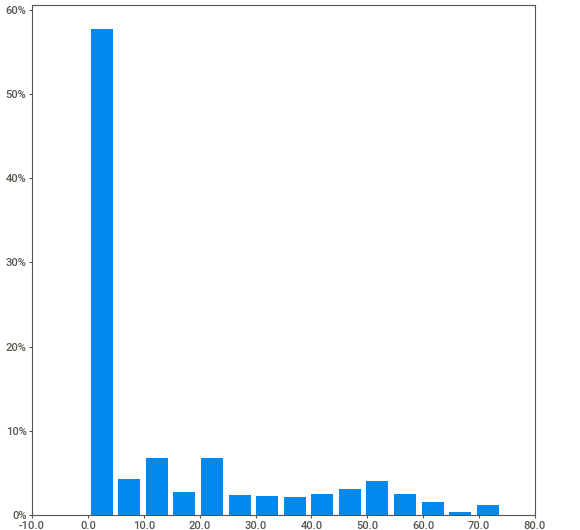
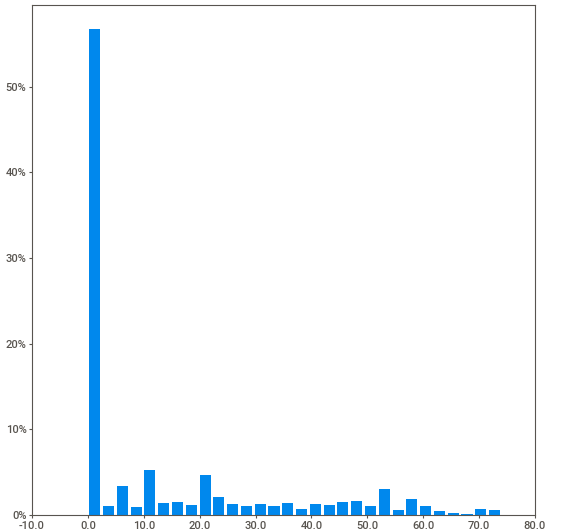
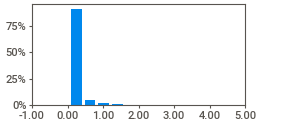
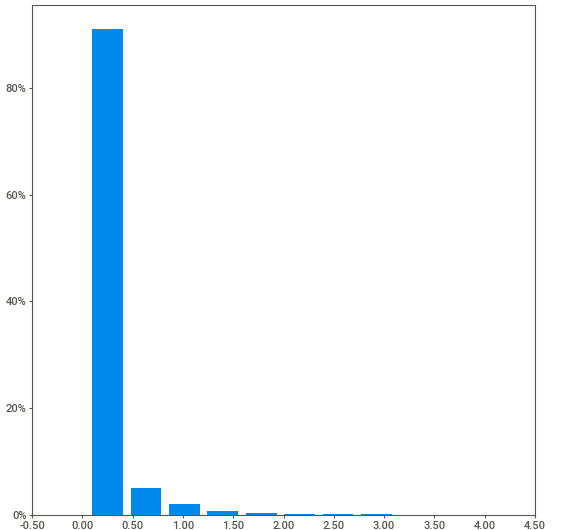
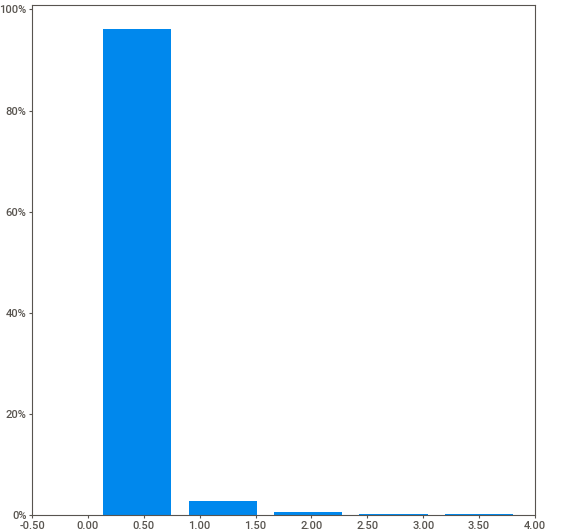
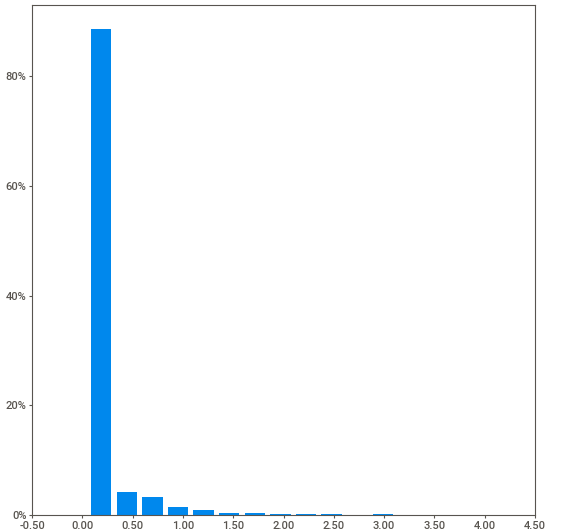
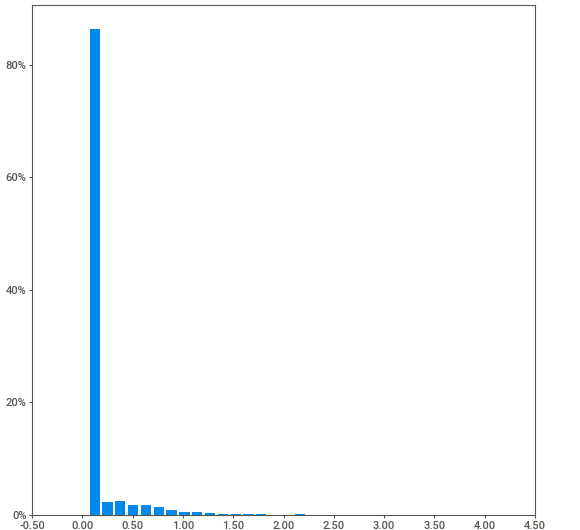
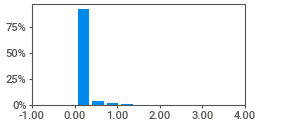
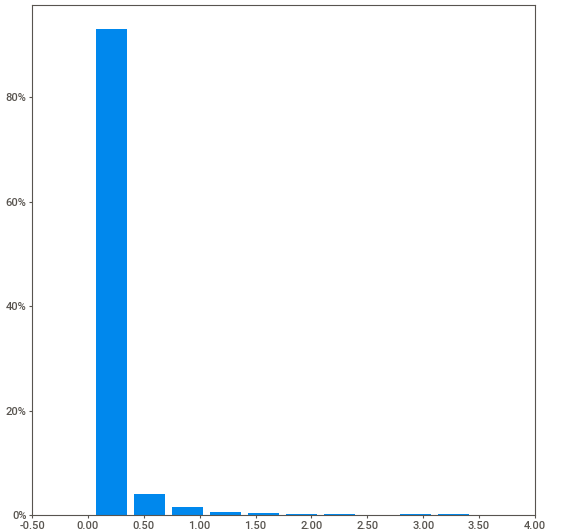
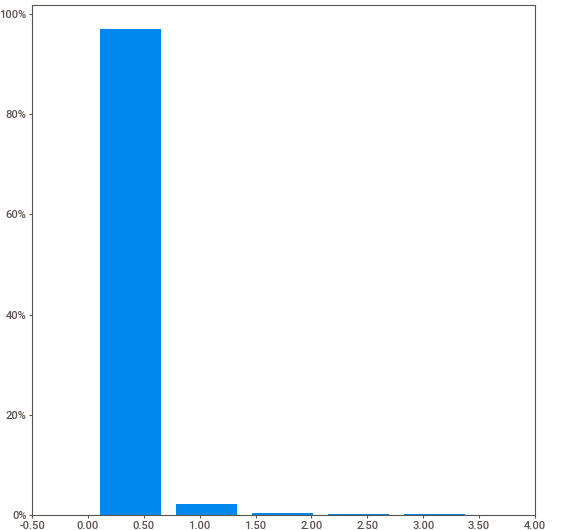
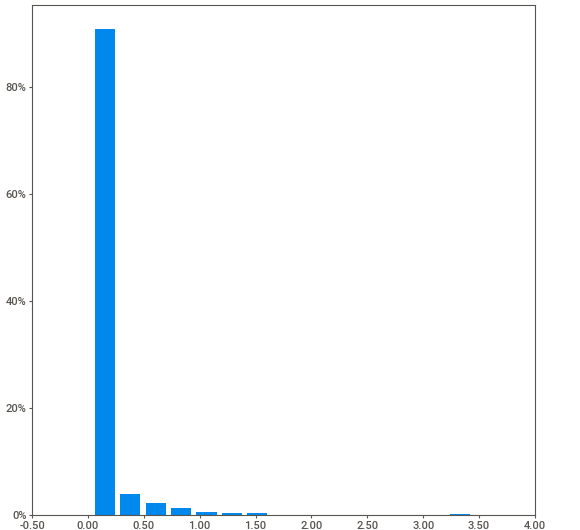
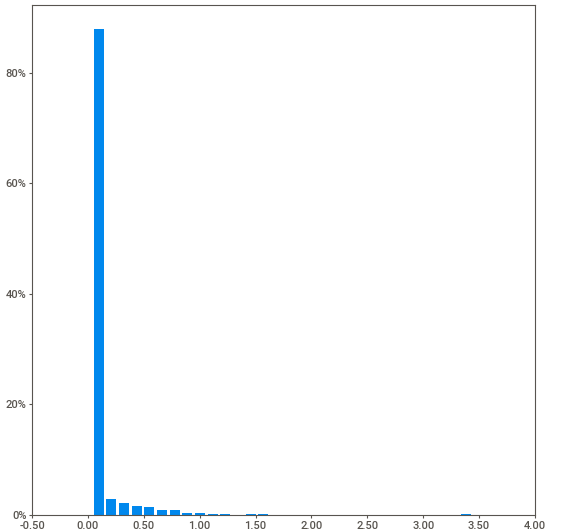
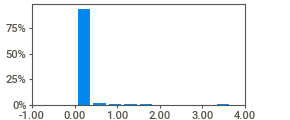
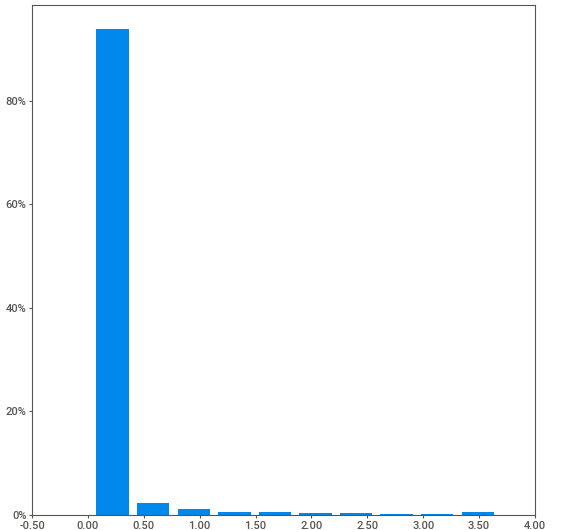
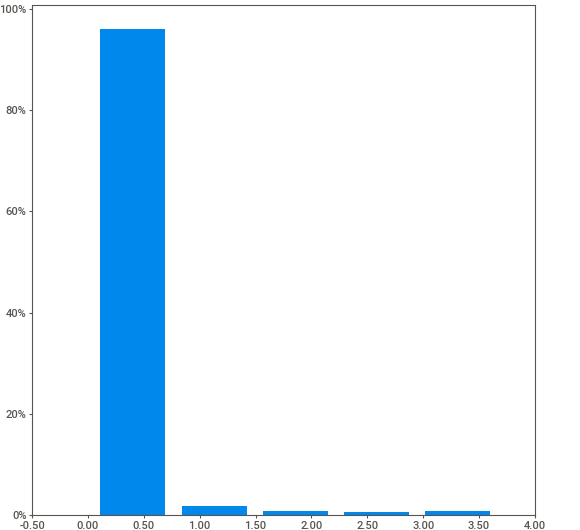
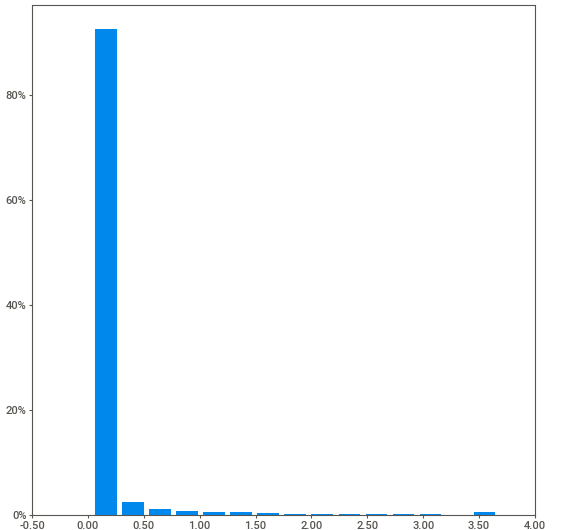
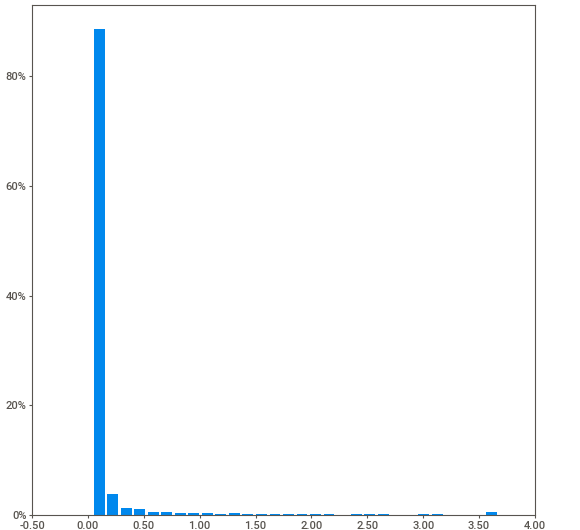
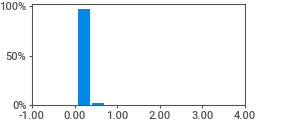
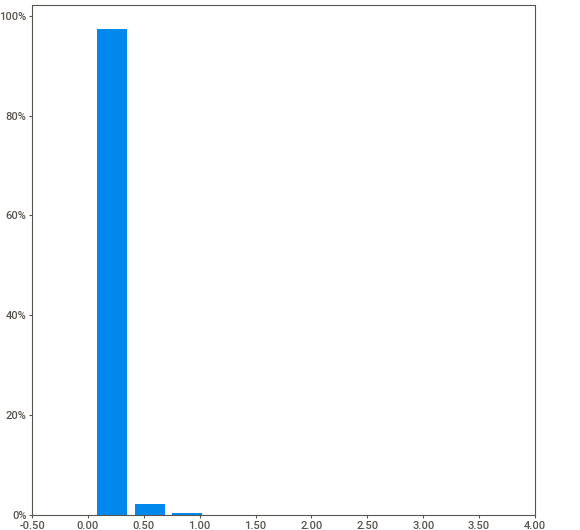
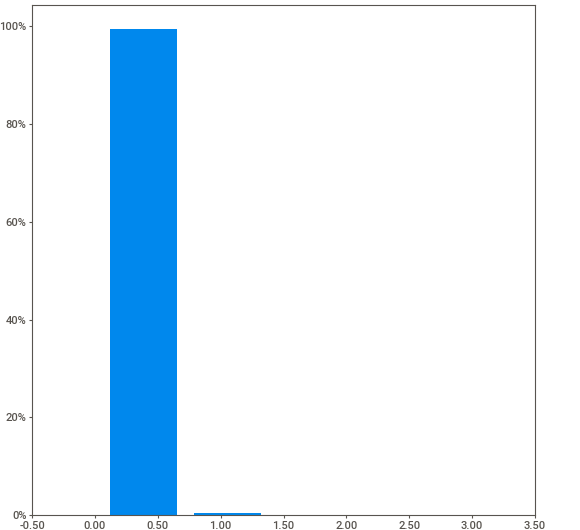
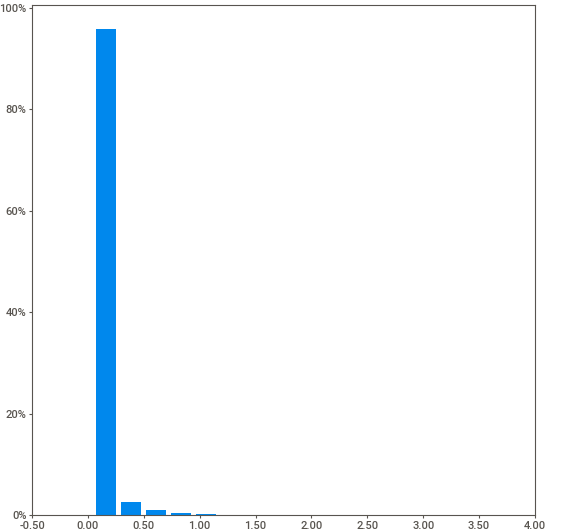
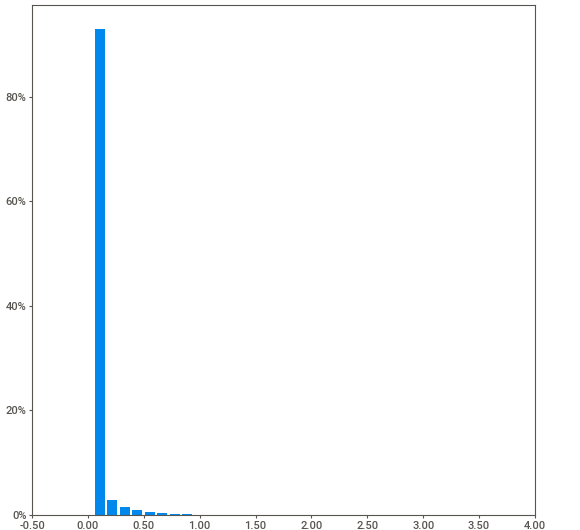
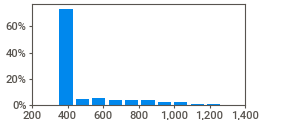
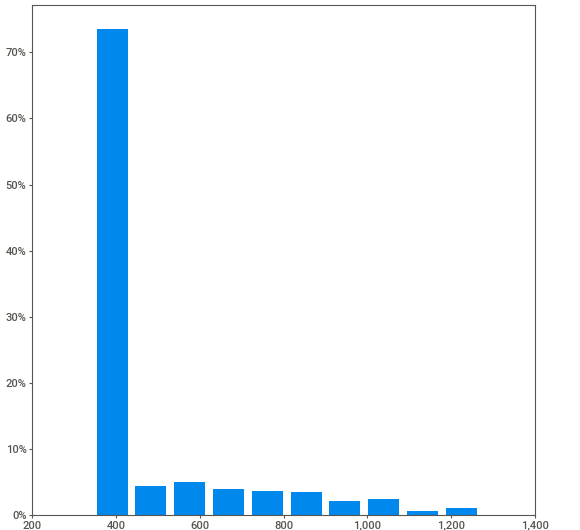
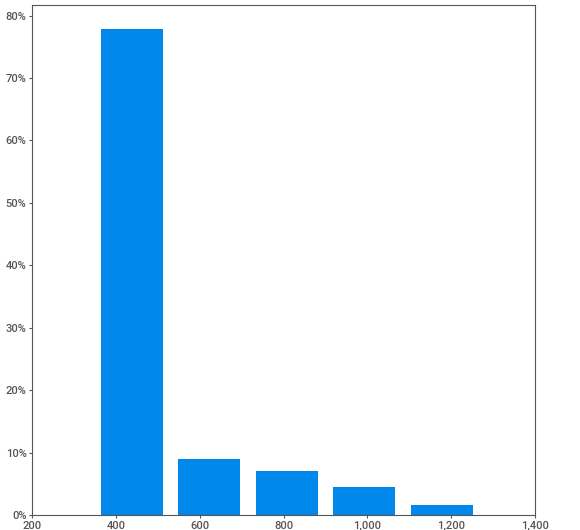
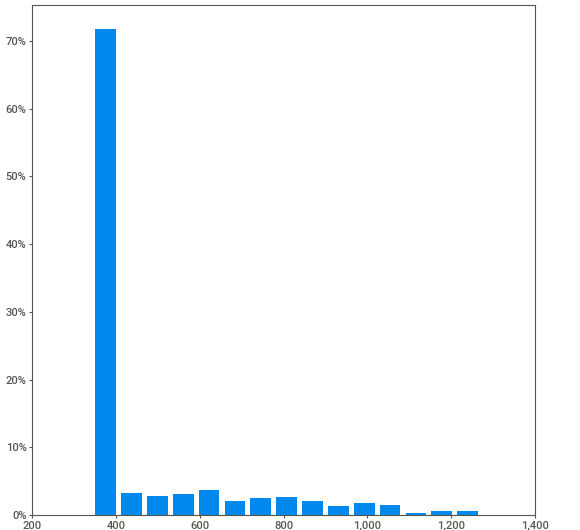
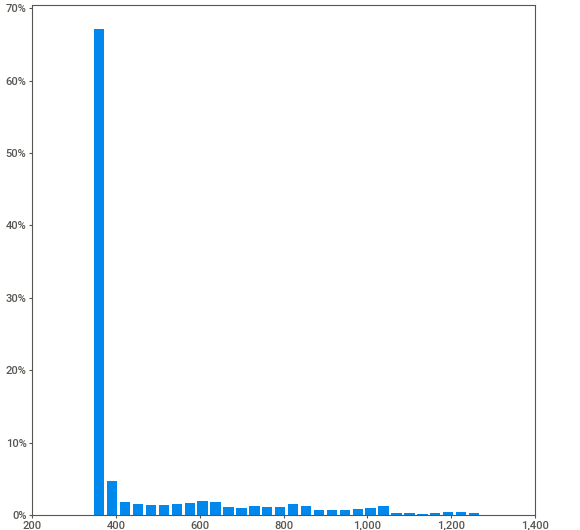
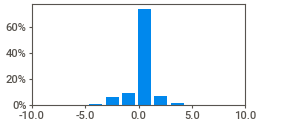
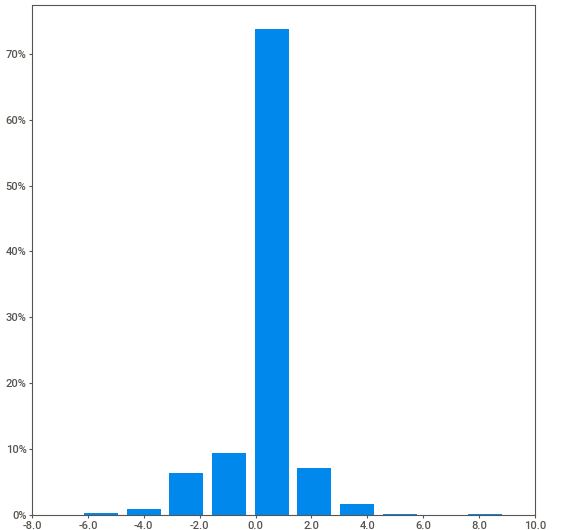
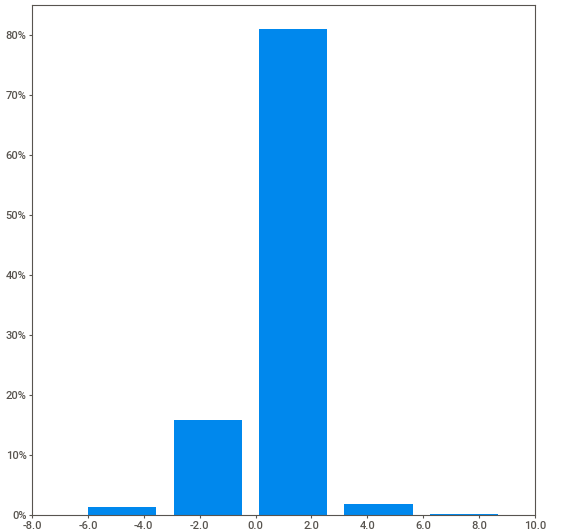
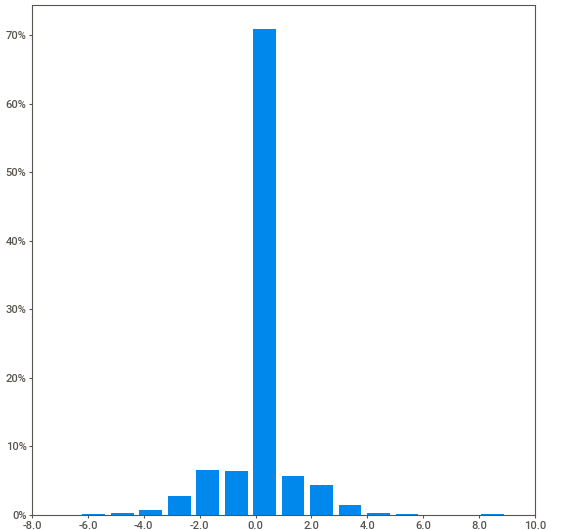
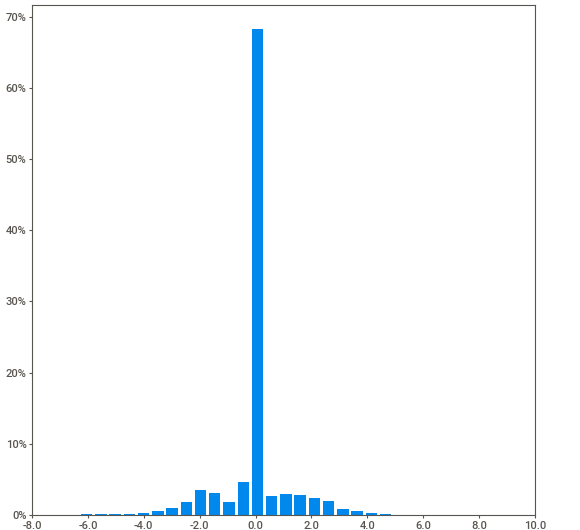
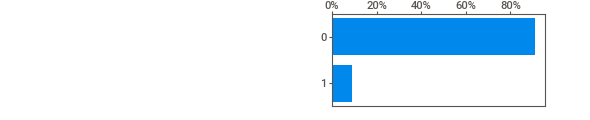
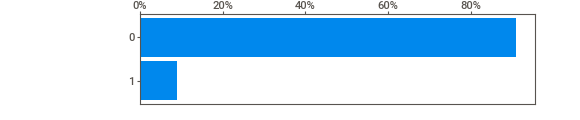
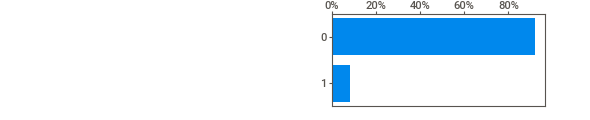
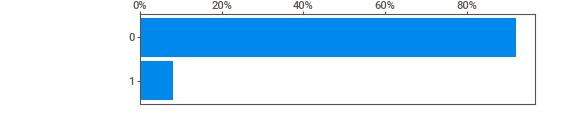
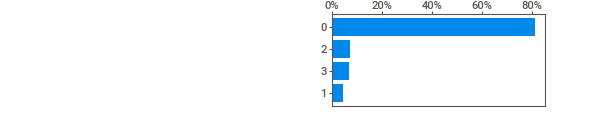
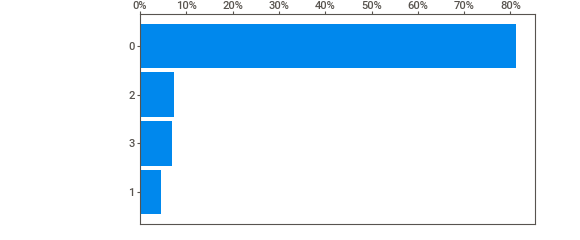
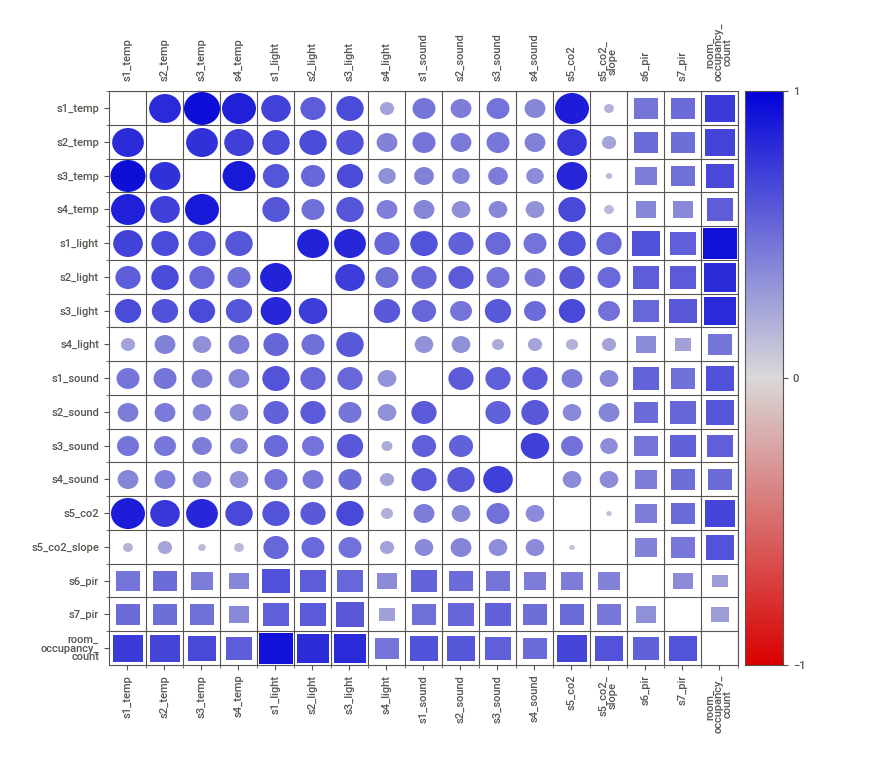
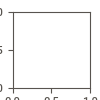

In [4]:
sv.analyze(data).show_notebook()

In [5]:
X, y = (
    data.drop(["room_occupancy_count", "datetime"], axis=1),
    data["room_occupancy_count"],
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/raja_/Documents/GitHub/msds_winter_2022/venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


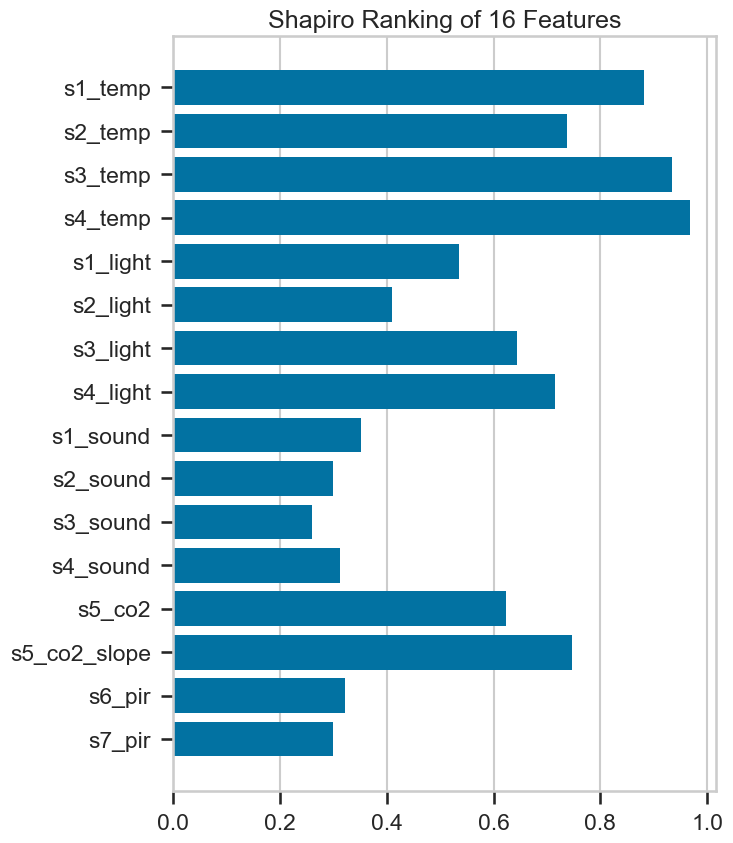

Signature:
rank1d(
    X,
    y=None,
    ax=None,
    algorithm='shapiro',
    features=None,
    orient='h',
    show_feature_names=True,
    color=None,
    show=True,
    **kwargs,
)
Docstring:
Scores each feature with the algorithm and ranks them in a bar plot.

This helper function is a quick wrapper to utilize the Rank1D Visualizer
(Transformer) for one-off analysis.

Parameters
----------
X : ndarray or DataFrame of shape n x m
    A matrix of n instances with m features

y : ndarray or Series of length n
    An array or series of target or class values

ax : matplotlib axes
    the axis to plot the figure on.

algorithm : one of {'shapiro', }, default: 'shapiro'
    The ranking algorithm to use, default is 'Shapiro-Wilk.

features : list
    A list of feature names to use.
    If a DataFrame is passed to fit and features is None, feature
    names are selected as the columns of the DataFrame.

orient : 'h' or 'v'
    Specifies a horizontal or vertical bar chart.

show_feature_

In [6]:
from yellowbrick.datasets import load_concrete
from yellowbrick.features import rank1d, rank2d

sns.set_context("talk")
plt.figure(figsize=(7, 10))
rank1d(X, y).show()
?rank1d

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
for dat, dat_name in [
    (X_train, "X_train"),
    (X_test, "X_test"),
    (y_train, "y_train"),
    (y_test, "y_test"),
]:
    print(dat_name)
    print(dat.shape[0])
    print(f"{dat.shape[0]/len(data):.0%} of data")
    print("-" * 50)

X_train
8103
80% of data
--------------------------------------------------
X_test
2026
20% of data
--------------------------------------------------
y_train
8103
80% of data
--------------------------------------------------
y_test
2026
20% of data
--------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/raja_/Documents/GitHub/msds_winter_2022/venv/lib/python3.8/site-packages/yellowbrick/target/class_balance.py:238: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  self.ax.set_ylim(0, cmax + cmax * 0.1)


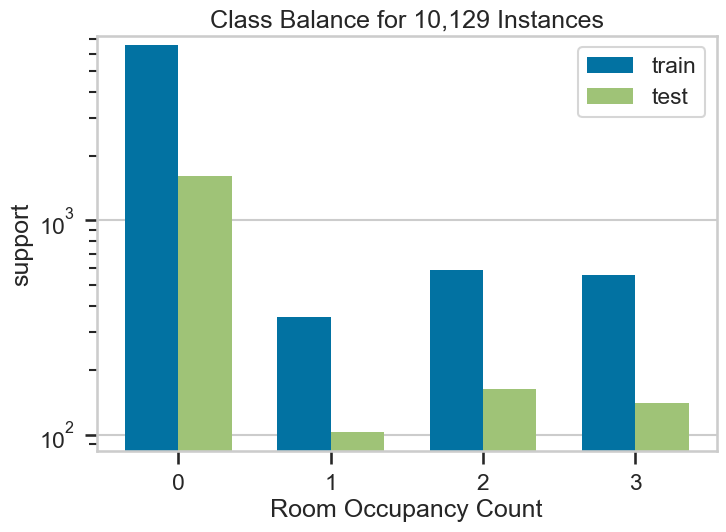

<AxesSubplot:title={'center':'Class Balance for 10,129 Instances'}, xlabel='Room Occupancy Count', ylabel='support'>

In [9]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1", "2", "3"])

visualizer.fit(y_train, y_test)  # Fit the data to the visualizer
plt.yscale("log")
plt.xlabel("Room Occupancy Count")
visualizer.show()

<IPython.core.display.Javascript object>

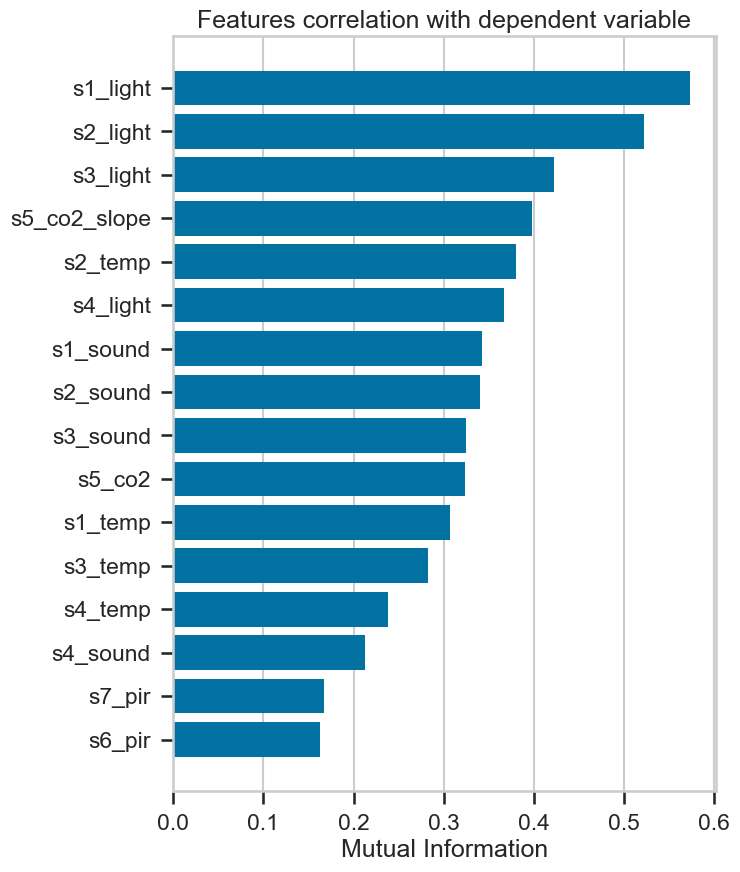

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [10]:
from yellowbrick.target import FeatureCorrelation


# Instaniate the visualizer
visualizer = FeatureCorrelation(method="mutual_info-classification", sort=True)
plt.figure(figsize=(7, 10))
visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

In [11]:
import dataframe_image as dfi

In [12]:
stats = (
    data.drop(columns=["room_occupancy_count", "datetime"])
    .agg(["mean", "std", "median", "min", "max"])
    .round(2)
)

In [13]:
dfi.export(stats, "../stats.png")

[0310/221001.465731:INFO:headless_shell.cc(659)] Written to file /var/folders/3c/mdbs2nh57lb084xrksjwy50w0000gn/T/tmp7k52pte4/temp.png.


<AxesSubplot:>

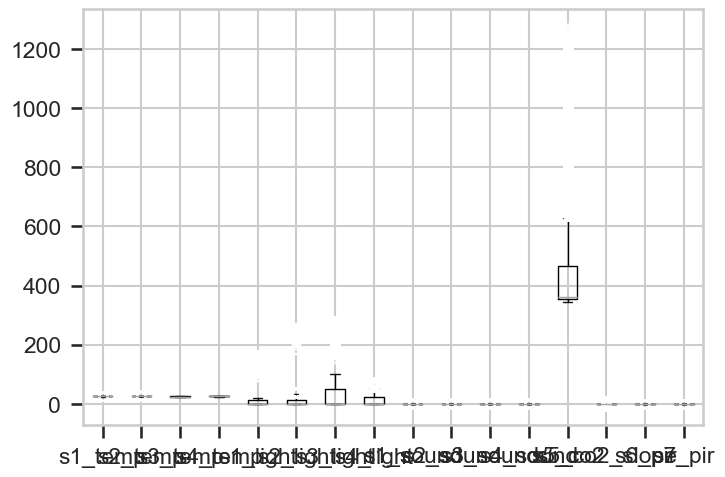

In [14]:
data.drop(columns=["room_occupancy_count", "datetime"]).boxplot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Temperature')

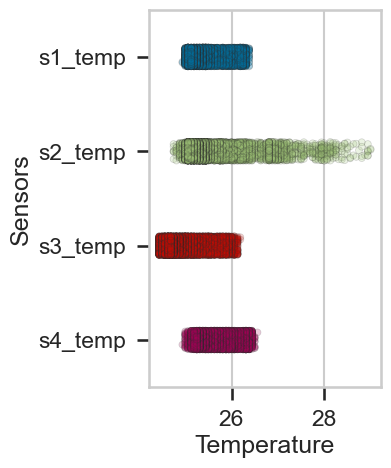

In [46]:
plt.figure(figsize=(3, 5))
sns.stripplot(
    data=data[[col for col in data.columns if "temp" in col]].melt(),
    alpha=0.2,
    linewidth=0.5,
    y="variable",
    x="value",
)

plt.ylabel("Sensors")
plt.xlabel("Temperature")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'sound')

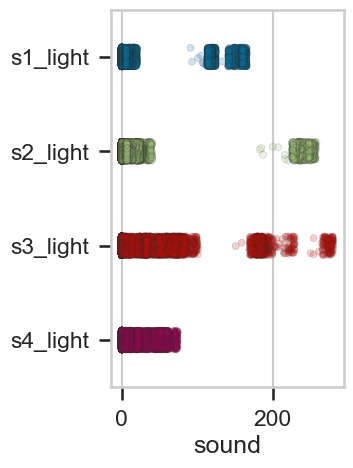

In [51]:
plt.figure(figsize=(3, 5))
sns.stripplot(
    data=data[[col for col in data.columns if "light" in col]].melt(),
    alpha=0.2,
    linewidth=0.5,
    y="variable",
    x="value",
)

plt.ylabel("")
plt.xlabel("Light")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'sound')

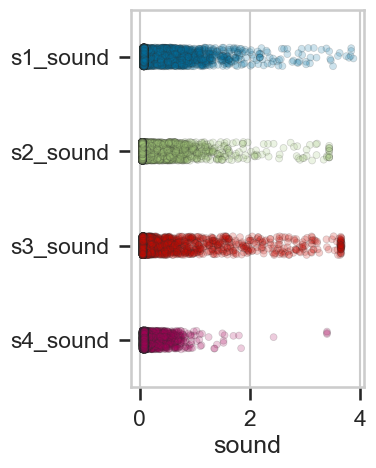

In [53]:
plt.figure(figsize=(3, 5))
sns.stripplot(
    data=data[[col for col in data.columns if "sound" in col]].melt(),
    alpha=0.2,
    linewidth=0.5,
    y="variable",
    x="value",
)

plt.ylabel("")
plt.xlabel("sound")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'PIR')

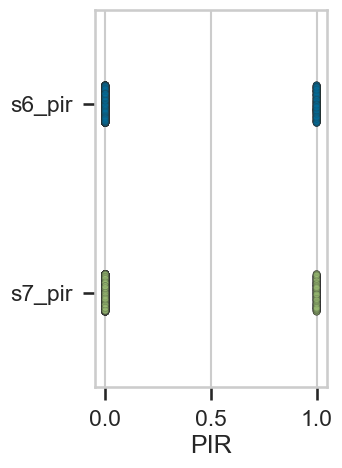

In [67]:
plt.figure(figsize=(3, 5))
sns.stripplot(
    data=data[
        [col for col in data.columns if "pir" in col and "slope" not in col]
    ].melt(),
    alpha=0.2,
    linewidth=0.5,
    y="variable",
    x="value",
)

plt.ylabel("")
plt.xlabel("PIR")

<IPython.core.display.Javascript object>

/Users/raja_/Documents/GitHub/msds_winter_2022/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='s5_co2', ylabel='Density'>

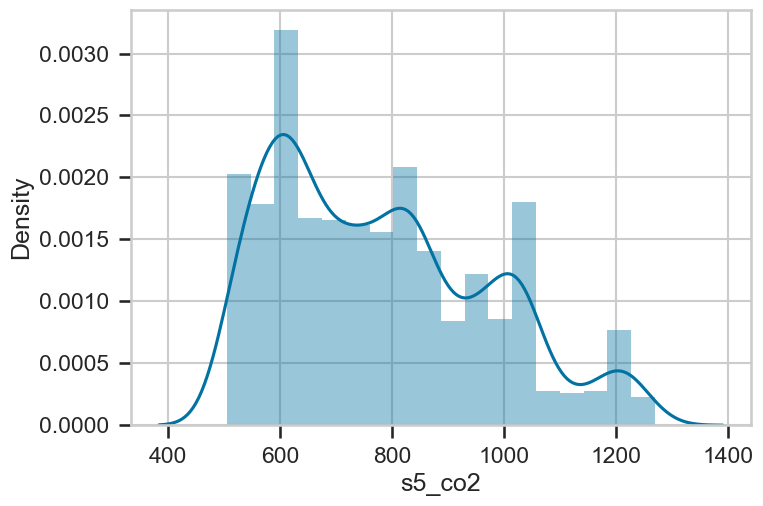

In [62]:
sns.distplot(data[data["s5_co2"] > 500]["s5_co2"])